## Running a SliM3 Simulation with `shadie`

In [1]:
from shadie import Shadie

2021-04-03 16:16:06.344 | WARNING  | shadie.mutations:__init__:82 - 'g', 'n', and 'w' distributions take 2 params
2021-04-03 16:16:06.345 | WARNING  | shadie.mutations:__init__:82 - 'g', 'n', and 'w' distributions take 2 params
2021-04-03 16:16:06.345 | WARNING  | shadie.mutations:__init__:74 - 'e' and 'f' distributions take 1 param
2021-04-03 16:16:06.346 | WARNING  | shadie.mutations:__init__:82 - 'g', 'n', and 'w' distributions take 2 params
2021-04-03 16:16:06.347 | DEBUG    | shadie.elements:__init__:78 - <MutationType: m2, 0.5,f, (0.0,)>
2021-04-03 16:16:06.347 | DEBUG    | shadie.elements:__init__:78 - <MutationType: m3, 0.1,g, (-0.03, 0.2)>
2021-04-03 16:16:06.348 | DEBUG    | shadie.elements:__init__:78 - <MutationType: m4, 0.8,e, (0.1,)>
2021-04-03 16:16:06.348 | DEBUG    | shadie.elements:__init__:78 - <MutationType: m2, 0.5,f, (0.0,)>
2021-04-03 16:16:06.349 | DEBUG    | shadie.elements:__init__:78 - <MutationType: m3, 0.1,g, (-0.03, 0.2)>
2021-04-03 16:16:06.350 | DEBUG   

If no arguments at all are passed to Shadie(), then a simple simulation will be created with the following defaults:
* default mutation types (see globals.py)
* default genomic element type = exon (see globals.py)
* mutation rate = 1e-07
* default chromosome structure (same as the structure created with an empty Chromosom() is initialized) = a single exon of 2000 base pairs and default mutation types in in equal frequencies
* recomb=1e-9
* generations = 3000
* Ne = 1000
* No population structure (no tree tolopology)

In [2]:
empty = Shadie()

04:14 | WARNING | __init__        | if no tree is provided, 'generations'argument must be provided (defines length of simulation in generations. Default value = 10000


Once the `Shadie` class object is initialized, one can simply run the `write()` function on it. A 'shadie.slim' file will be written to the current directory. It is suggested that the user open this file and inspect it for errors. A user can also open this file (or copy and paste its contents) into the SLiMgui and run the simulation that way. The output can still be accessed by `shadie` postsim functions as long as the `shadie.trees` output file is saved to the same directory as `shadie.slim`

In [ ]:
empty.write()

If the user prefers to run the simulation using `shadie`, they can simply call the `run()` function on the `Shadie` class object

In [5]:
empty.run()

The function `postsim()` runs a simple ancestral --> derived mutation count to check that the simulation was successful

In [9]:
empty.postsim()

ancestral	derived	count
A	A	1
A	C	23
A	G	33
A	T	26
C	A	26
C	C	5
C	G	31
C	T	29
G	A	31
G	C	25
G	G	10
G	T	27
T	A	29
T	C	29
T	G	24
T	T	5


The tree sequence object is saved to a `shadie.trees` file and can be accessed by calling `.ts` on the `Shadie` object once the simulation has finished:

In [8]:
empty.ts

## Running the SLiMulation with Demography

In [5]:
import toytree
import numpy as np

#Make the tree
tree = toytree.rtree.unittree(ntips=10, treeheight=1e4, seed=123)
randtree = tree.set_node_values(
    feature="Ne", 
    values={i: np.random.randint(10000, 100000) for i in tree.idx_dict}
)

In [6]:
tree_sim = Shadie(tree = randtree)

In [7]:
tree_sim.write()

This setup currently runs at ~300 generations/CPU minute which is definitely too long to do anything big *and* this is with a simple single-exon genome and no reproduction. However, it is simulating neutral mutations.

In [ ]:
#tree_sim.run()

## Running the SLiMulation with complex Chromosome Structure

In [2]:
from shadie import Chromosome
from shadie import Build

In [3]:
random_chrom = Build().random()

04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO 

04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO    | random          | Gene added
04:16 | INFO 

In [4]:
test_chromosome = Chromosome(genome = random_chrom)

In [5]:
testing_chromosome = Shadie(chromosome = test_chromosome)

04:16 | WARNING | __init__        | if no tree is provided, 'generations'argument must be provided (defines length of simulation in generations. Default value = 10000


In [7]:
testing_chromosome.write()

In [8]:
testing_chromosome.run()

This chromosome runs very quickly with no population structure (seconds)

In [12]:
testing_chromosome.postsim()

ancestr	derived	count
A	A	4
A	C	3
A	G	3
A	T	3
C	A	0
C	C	2
C	G	5
C	T	1
G	A	4
G	C	3
G	G	5
G	T	5
T	A	6
T	C	5
T	G	2
T	T	10


In [19]:
postsim = testing_chromosome.ts.draw_svg(path = "random-chrom.svg")

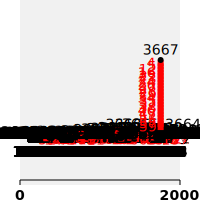

In [20]:
from IPython.display import SVG, display
display(SVG(postsim))

In [28]:
testing_chromosome.ts.Tajimas_D()

array(-1.46925547)